In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.fft import fft, fftfreq 
from scipy import fft
import scipy.io
from scipy import signal

from adtk.data import validate_series
from adtk.visualization import plot
import seaborn as sns
import scipy.io
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [2]:

def getData(s,ss):
    mat = []
    for i in range(1,21):  
        m = scipy.io.loadmat(s +ss + str(i) +  ".mat")
        mat.append(m)
    X = []
    Y = []
    I = []
    for i in range(0,20):
        M = mat[i]
        dd = ss + str(i+1)
        M = M [dd]
        X.append(M["X"][0][0]["Data"][0])
        Y.append(M["Y"][0][0]["Data"][0])
        

    XData = np.arange(0)
    YData = np.arange(0)
    IData = np.arange(0)

    for i in range(0,20):
        XData = np.append(XData,X[i][1][0])
        YData = np.append(YData, Y[i][6][0])
    return [XData,YData]

def getSample(s,ss):
    m = scipy.io.loadmat(s+ss+".mat")
    M = m[ss]
    X = np.arange(0)
    Y = np.arange(0)
    X = np.append(X,M["X"][0][0]["Data"][0][1][0])
    Y = np.append(Y,M["Y"][0][0]["Data"][0][6][0])
    return [X,Y]

def getSampleI(s,ss):
    m = scipy.io.loadmat(s+ss+".mat")
    M = m[ss]
    X = np.arange(0)
    Y = np.arange(0)
    I = np.arange(0)
    X = np.append(X,M["X"][0][0]["Data"][0][1][0])
    Y = np.append(Y,M["Y"][0][0]["Data"][0][6][0])
    I = np.append(I,M[0][0][2][0][1][2][0])
    return [X,Y,I]
    
#YData4 = fft(YData4)
N = 1000
T = 1.0 / 400.0
lx = fftfreq(N, T)[:N//2]
X1,Y1 = getSample("bearing/K005/","N15_M07_F10_K005_1")
X2,Y2 = getSample("bearing/KA05/","N15_M07_F10_KA05_1")
X3,Y3 = getSample("bearing/KI05/","N15_M07_F10_KI05_1")
X4,Y4 = getSample("bearing/KB27/","N15_M07_F10_KB27_1")

X1 = X1[0:256000]
X1 = np.linspace(0,4,256000)
Y1 = Y1[0:256000]
Y2 = Y2[0:256000]
Y3 = Y3[0:256000]
Y4 = Y4[0:256000]

XData1, YData1 = getData("bearing/K005/","N15_M07_F10_K005_")
XData2, YData2 = getData("bearing/KA05/","N15_M07_F10_KA05_")
XData3, YData3 = getData("bearing/KI05/","N15_M07_F10_KI05_")    
XData4, YData4 = getData("bearing/KB27/","N15_M07_F10_KB27_") 
lx = np.linspace(0,80, 5120000)
XData1 = XData1[0:len(lx)]
YData1 = YData1[0:len(lx)]
YData2 = YData2[0:len(lx)]
YData3 = YData3[0:len(lx)]
YData4 = YData4[0:len(lx)]


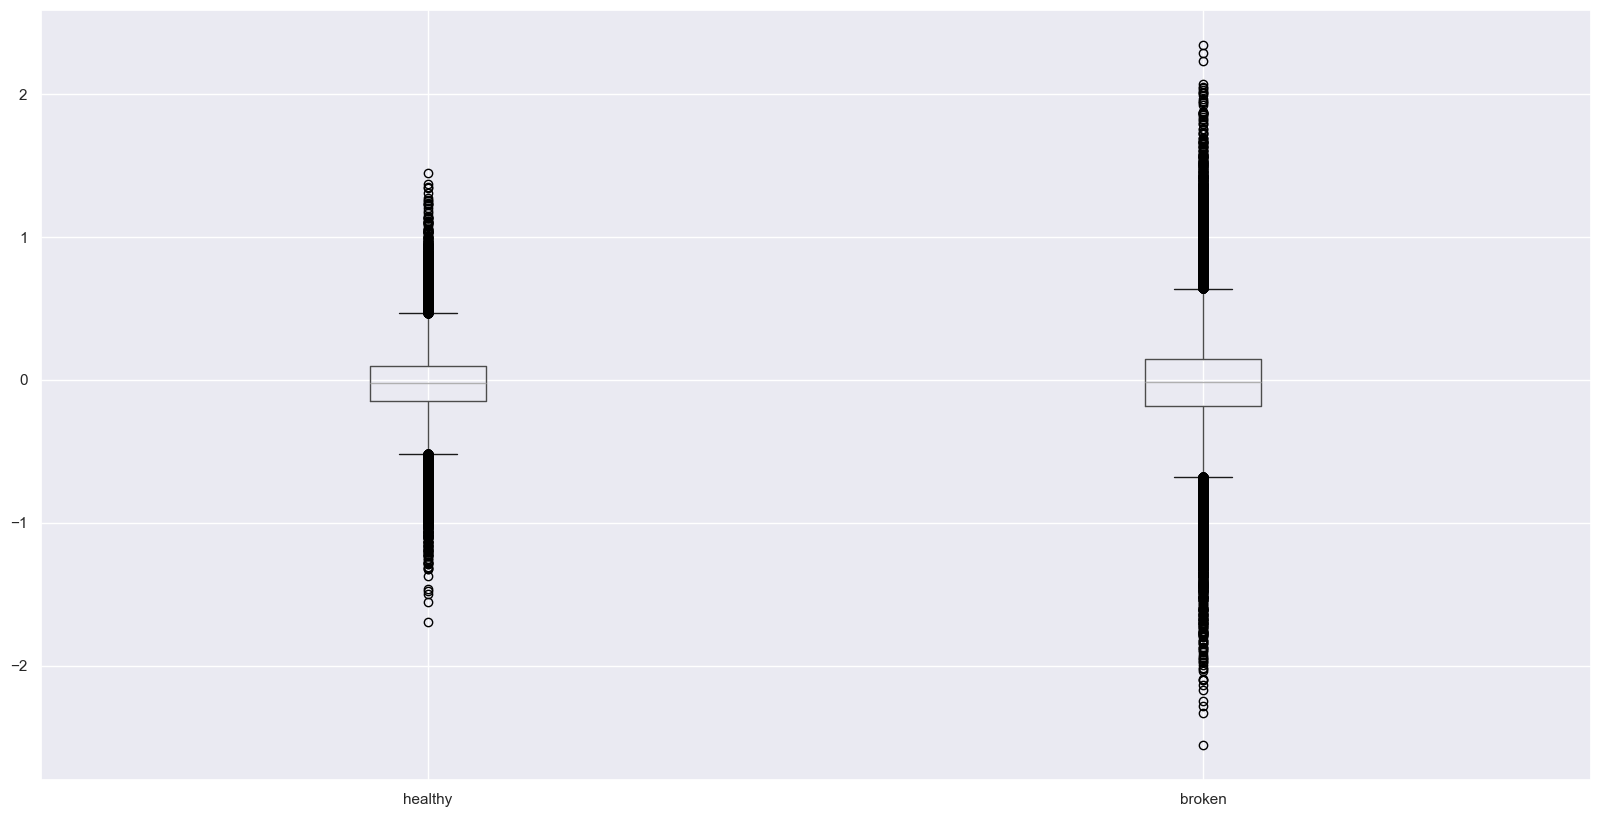

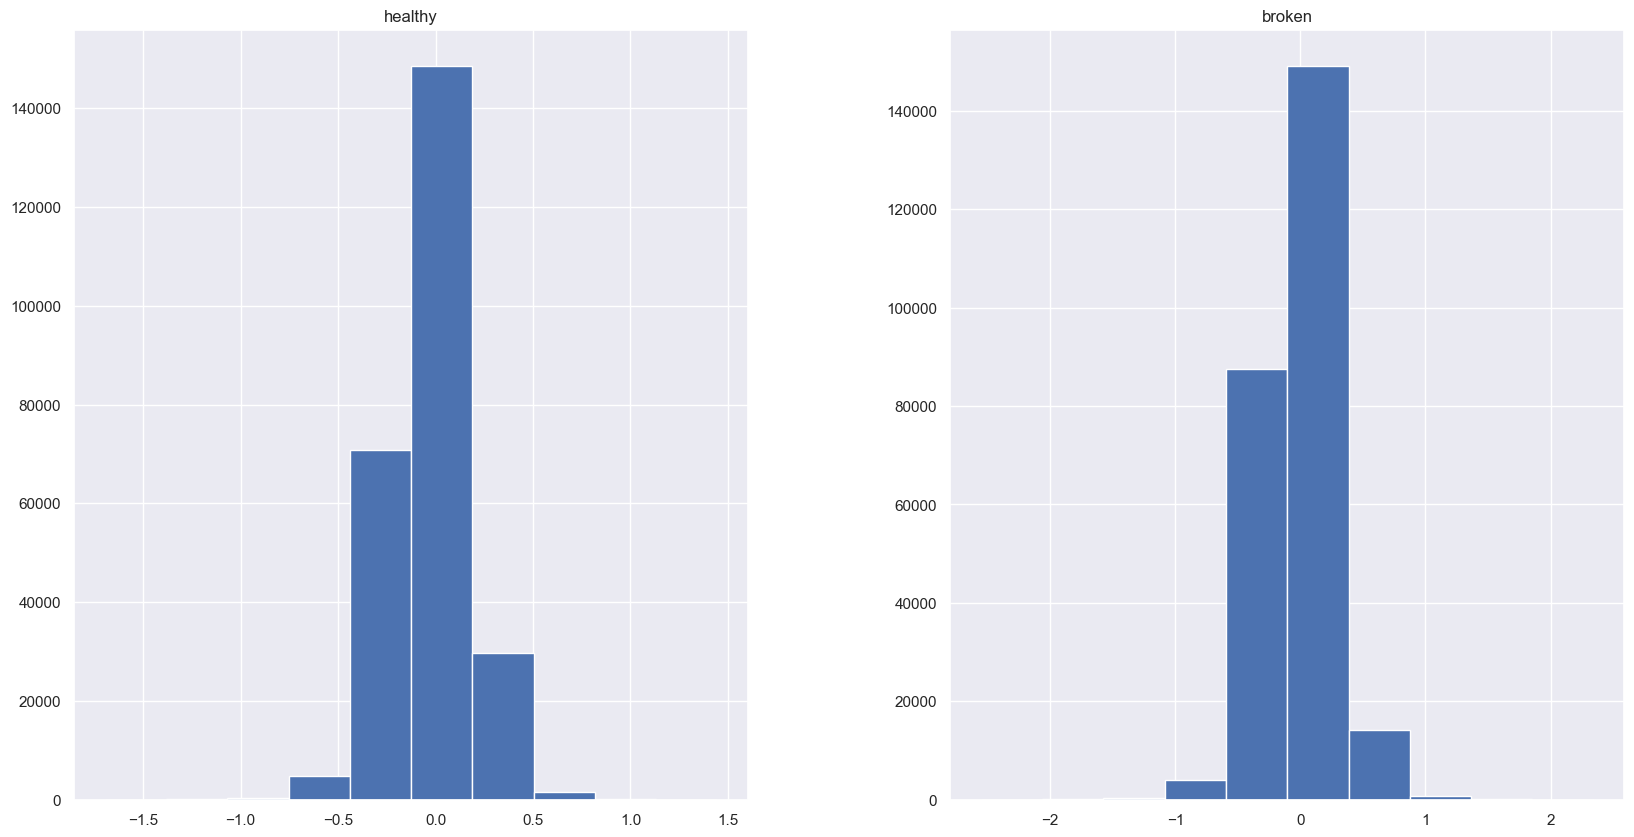

In [3]:
time = pd.to_datetime(X1,unit="s")
#ttime = pd.to_timedelta(tt,unit="milliseconds")
#ttime.to_pytimedelta()
tt = X1
df = pd.DataFrame(index=time, data = {"healthy": Y1,"broken":Y2})
df.head()
s = validate_series(df)
#s = df
sns.set(rc= {"figure.figsize": (20,10)})
df.boxplot()
df.hist()
plt.show()


In [4]:


def myplot(tt,data, anomalies):
    print(len(tt),len(data))
    ano1 = anomalies.iloc[0:,0]
    ano2 = anomalies.iloc[0:,1]
    dataA = data.iloc[0:,0]
    dataB = data.iloc[0:,1]
    aa = np.empty(0)
    at = np.empty(0)
    bb = np.empty(0)
    bt = np.empty(0)
    
    for i in range(0,len(tt)):
        if (ano1[i]==True):
            aa = np.append(aa,dataA[i])
            at = np.append(at,tt[i])
        if (ano2[i]==True):
            bb =np.append(bb,dataB[i])
            bt = np.append(bt,tt[i])
    
    fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figure= (10,5))
    ax1.plot(tt,data["healthy"],marker=".",color = "blue",label="gesund",zorder=1)
    ax2.plot(tt,data["broken"],marker=".",color= "orange",label="beschädigt",zorder=1)
    ax1.scatter(at,aa,marker = "o",color="red",label="Ausreißer",zorder=2)
    ax2.scatter(bt,bb,marker="o",color="red",label ="Ausreißer",zorder=2)
    ax1.set_ylabel("Beschleunigung in [m/s^2]")
    ax1.set_xlabel("Zeit in [s]")
    ax2.set_ylabel("Beschleunigung in [m/s^2]")
    ax2.set_xlabel("Zeit in [s]")
    ax1.legend()
    ax2.legend()
    plt.show()

def myplotSmall(tt,data, anomalies,min,max):
    print(len(tt),len(data))
    ano1 = anomalies.iloc[0:,0]
    ano2 = anomalies.iloc[0:,1]
    dataA = data.iloc[0:,0]
    dataB = data.iloc[0:,1]
    aa = np.empty(0)
    at = np.empty(0)
    bb = np.empty(0)
    bt = np.empty(0)
    #aa = np.zeros(len(tt))
    #at = np.zeros(len(tt))
    #bb = np.zeros(len(tt))
    #bt = np.zeros(len(tt))
    
    for i in range(0,len(tt)):
        if (ano1[i]==True):
            aa = np.append(aa,dataA[i])
            #aa[i]=dataA[i]
            at = np.append(at,tt[i])
        if (ano2[i]==True):
            bb =np.append(bb,dataB[i])
            bt = np.append(bt,tt[i])
    
    fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figure= (10,5))
    ax1.plot(tt,data["healthy"],marker=".",color = "blue",label="gesund",zorder=1)
    ax2.plot(tt,data["broken"],marker=".",color= "orange",label="beschädigt",zorder=1)
    ax1.scatter(at,aa,marker = "o",color="red",label="Ausreißer",zorder=2)
    ax2.scatter(bt,bb,marker="o",color="red",label ="Ausreißer",zorder=2)
    ax1.set_ylabel("Beschleunigung in [m/s^2]")
    ax1.set_xlabel("Zeit in [s]")
    ax2.set_ylabel("Beschleunigung in [m/s^2]")
    ax2.set_xlabel("Zeit in [s]")
    ax1.set_xlim(min,max)
    ax2.set_xlim(min,max)
    ax1.legend()
    ax2.legend()
    plt.show()

def myplotmulti(tt,data, anomalies):
    print(len(tt),len(data))
    ano1 = anomalies.iloc[0:]
    #ano2 = anomalies.iloc[0:,1]
    dataA = data.iloc[0:,0]
    #dataB = data.iloc[0:,1]
    aa = np.empty(0)
    at = np.empty(0)
    #bb = np.empty(0)
    #bt = np.empty(0)
    
    for i in range(0,len(tt)):
        if (ano1[i]==True):
            aa = np.append(aa,dataA[i])
            at = np.append(at,tt[i])
        #if (ano2[i]==True):
         #   bb =np.append(bb,dataB[i])
          #  bt = np.append(bt,tt[i])
    
    fig, (ax1) = plt.subplots(nrows=1,ncols=1,figure= (10,5))
    ax1.plot(tt,data["healthy"],marker=".",color = "blue",label="gesund",zorder=1)
    ax1.plot(tt,data["broken"],marker=".",color= "orange",label="beschädigt",zorder=1)
    ax1.scatter(at,aa,marker = "o",color="red",label="Ausreißer",zorder=2)
    #ax2.scatter(bt,bb,marker="o",color="red",label ="Ausreißer",zorder=2)
    ax1.set_ylabel("Beschleunigung in [m/s^2]")
    ax1.set_xlabel("Zeit in [s]")
    #ax2.set_ylabel("Beschleunigung in [m/s^2]")
    #ax2.set_xlabel("Zeit in [s]")
    ax1.legend()
    #ax2.legend()
    plt.show()


def calcMetric(array_true, array_pred):
    tt = np.zeros(len(array_pred))
    for i in range(0,len(array_pred)):
        if array_pred[i]== True:
            tt[i] = True
        else:
            tt[i]= False
    array_pred = tt
    print("Accuracy score   = "  ,accuracy_score(array_true, array_pred))
    print("Precision score  = "  ,precision_score(array_true, array_pred))
    print("Recall score     = "  ,recall_score(array_true, array_pred))
    print("F1 score         = "  ,f1_score(array_true, array_pred))
    print("Cohens score     = "  ,cohen_kappa_score(array_true, array_pred))
    return array_pred



   

256000 256000


C:\Users\Poldy\AppData\Local\Temp\ipykernel_4980\2434942953.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (ano1[i]==True):
C:\Users\Poldy\AppData\Local\Temp\ipykernel_4980\2434942953.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (ano2[i]==True):
C:\Users\Poldy\AppData\Local\Temp\ipykernel_4980\2434942953.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bb =np.append(bb,dataB[i])
C:\Users\Poldy\AppData\Local\T

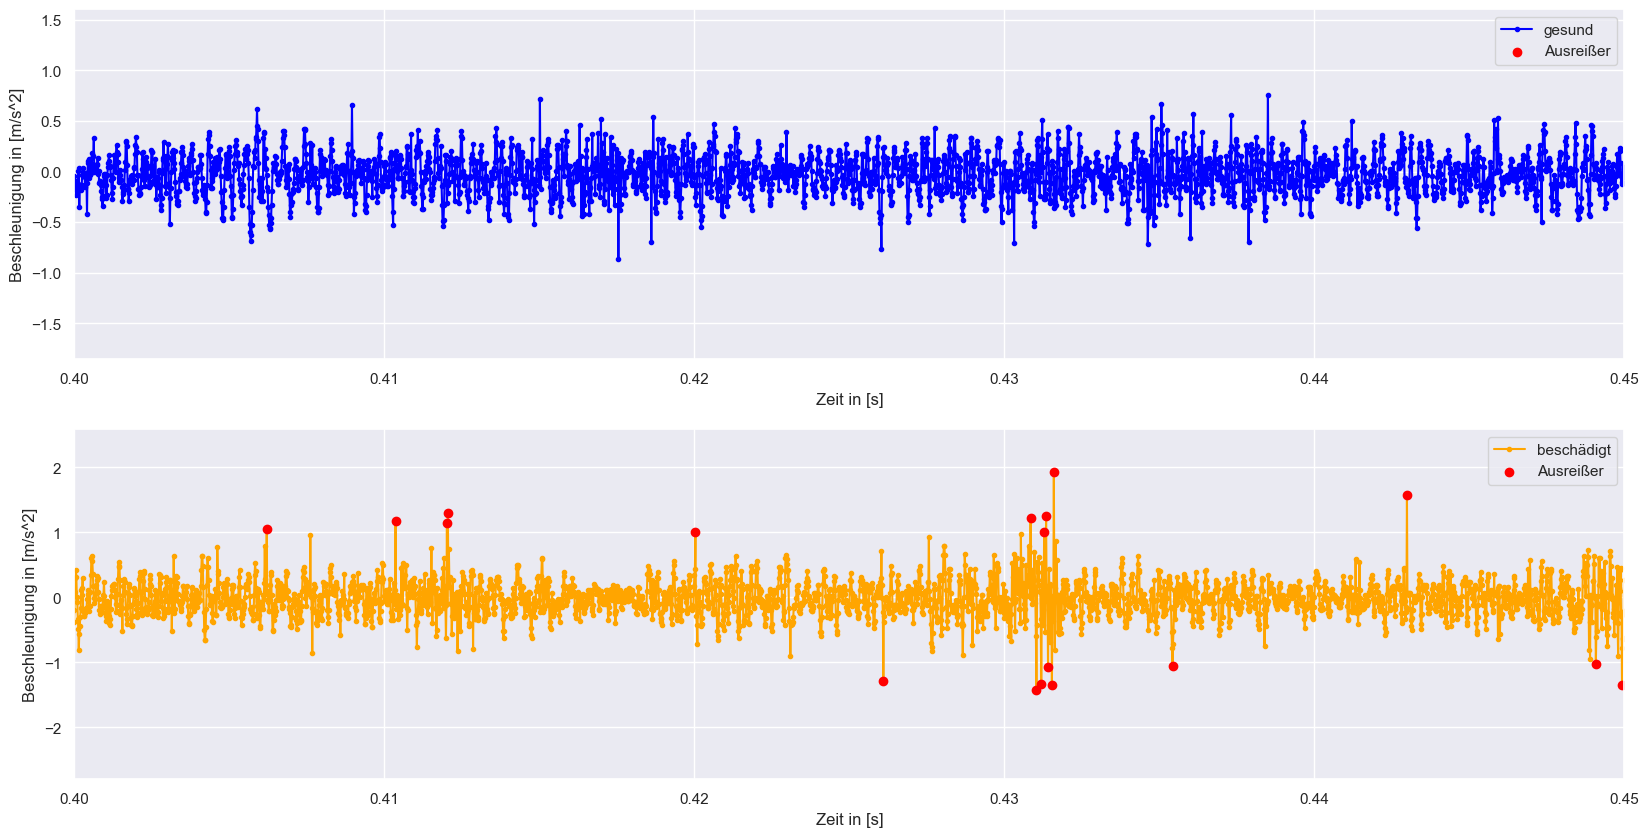

In [5]:
from adtk.detector import ThresholdAD


threshold_ad = ThresholdAD(high=1, low=-1)
anomalies = threshold_ad.detect(s)

from adtk.visualization import plot

#myplot(tt,s,anomalies)
myplotSmall(tt,s,anomalies,0.4,0.45)
#array_pred1 = calcMetric(array_true,anomalies1.iloc[0:,1])
#RocCurveDisplay.from_predictions(anno[0:],anno[1:], ax=ax,name="TreshholdAD")
plt.show()


256000 256000


C:\Users\Poldy\AppData\Local\Temp\ipykernel_4980\2434942953.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (ano1[i]==True):
C:\Users\Poldy\AppData\Local\Temp\ipykernel_4980\2434942953.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (ano2[i]==True):
C:\Users\Poldy\AppData\Local\Temp\ipykernel_4980\2434942953.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aa = np.append(aa,dataA[i])
C:\Users\Poldy\AppData\Local\

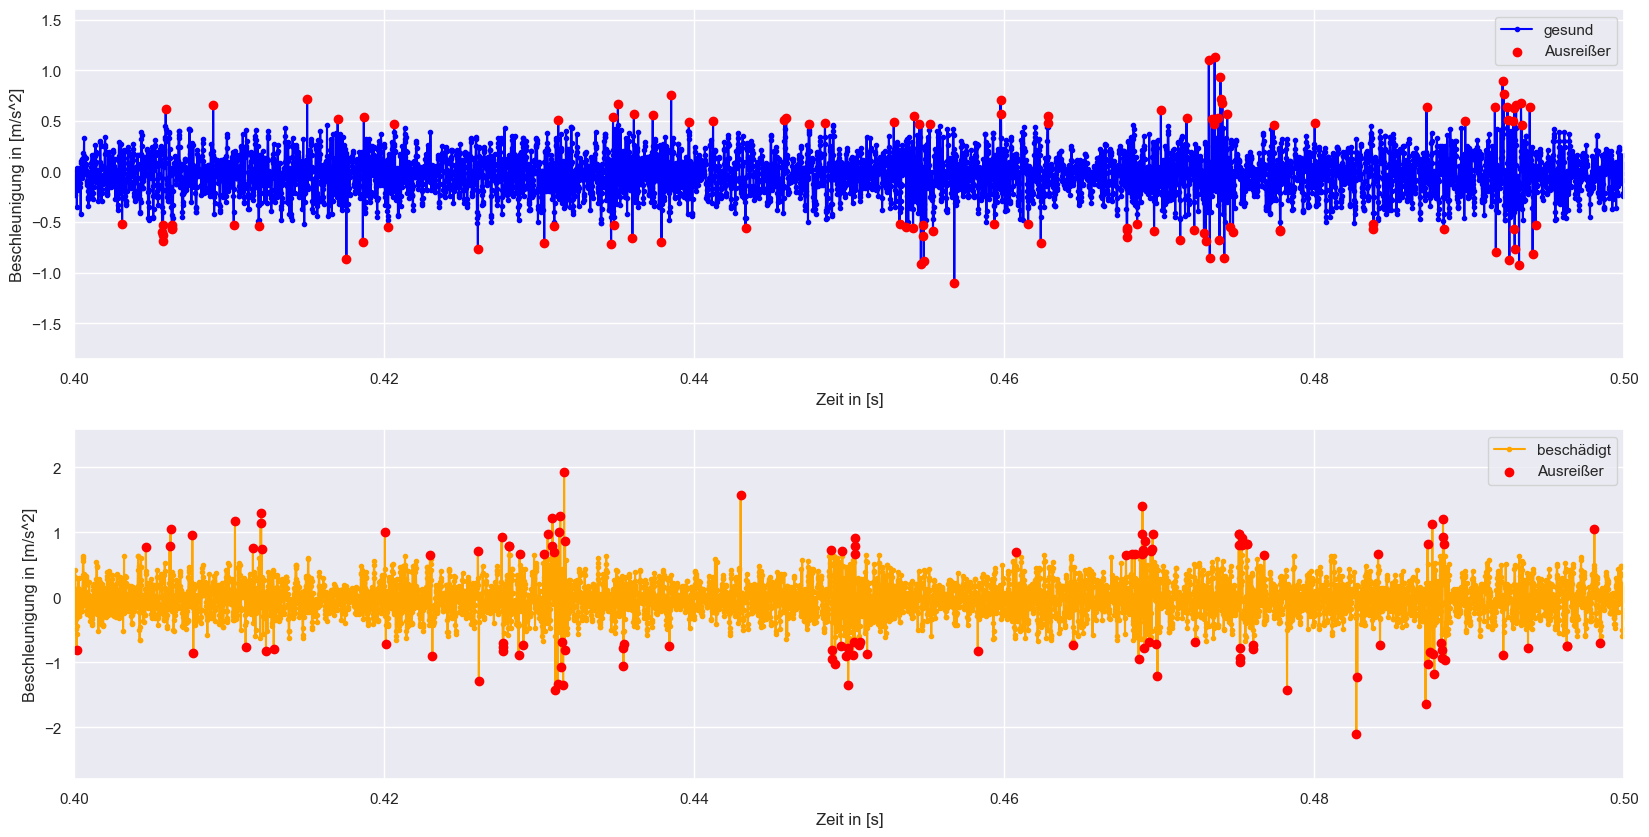

In [6]:
from adtk.detector import QuantileAD
quantile_ad = QuantileAD(high=0.99, low=0.01)
anomalies = quantile_ad.fit_detect(s)


#print([0])
myplotSmall(tt,s,anomalies,0.4,0.5)

256000 256000


C:\Users\Poldy\AppData\Local\Temp\ipykernel_4980\2434942953.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (ano1[i]==True):
C:\Users\Poldy\AppData\Local\Temp\ipykernel_4980\2434942953.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (ano2[i]==True):
C:\Users\Poldy\AppData\Local\Temp\ipykernel_4980\2434942953.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aa = np.append(aa,dataA[i])
C:\Users\Poldy\AppData\Local\

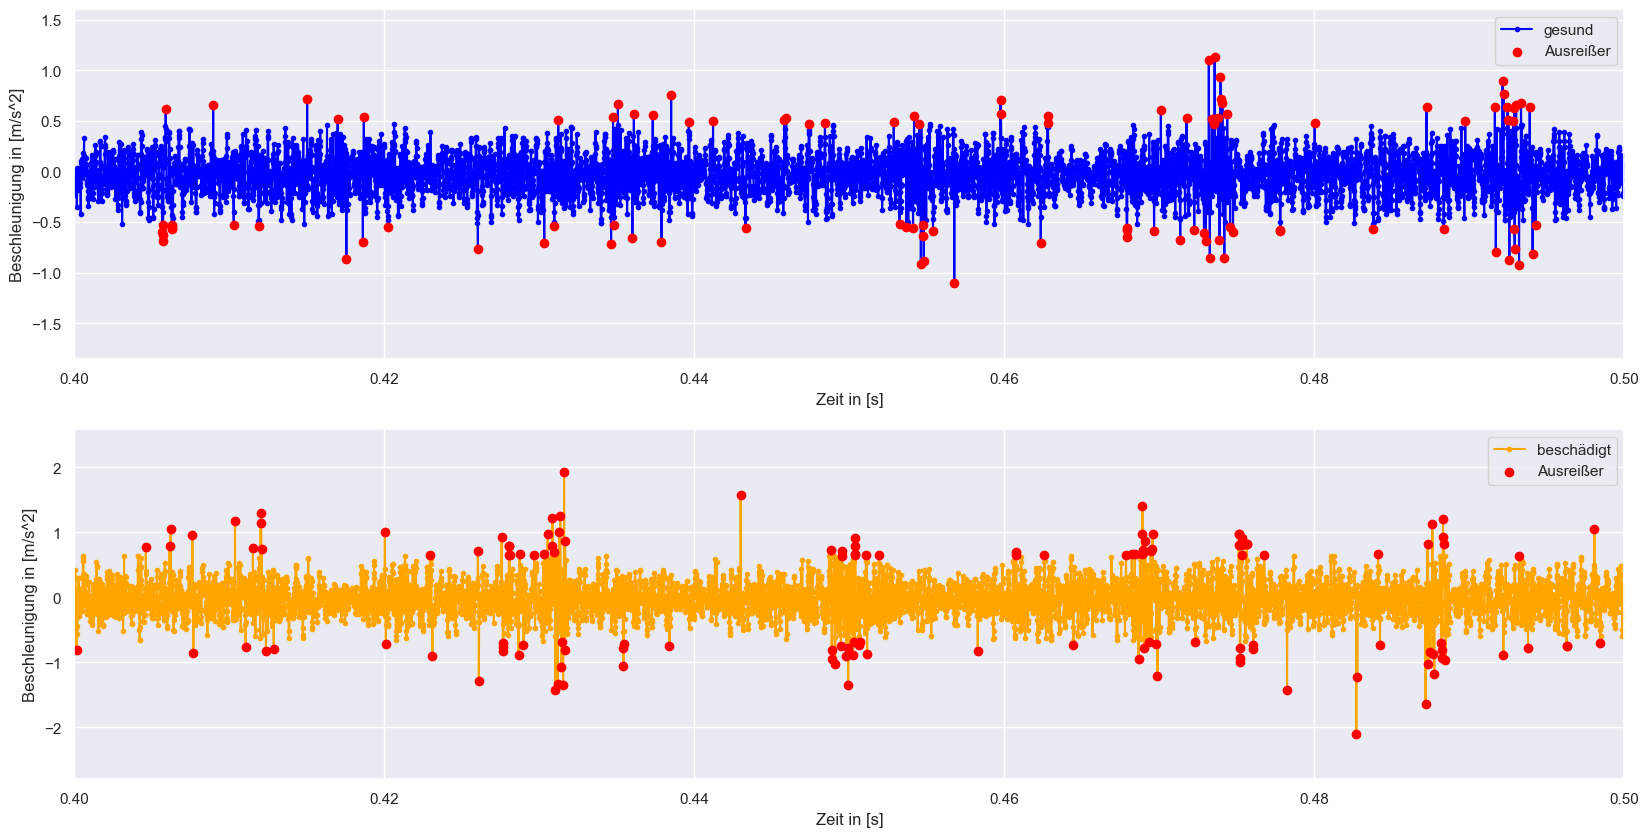

In [7]:
from adtk.detector import InterQuartileRangeAD
iqr_ad = InterQuartileRangeAD(c=1.5)
anomalies = iqr_ad.fit_detect(s)
myplotSmall(tt,s,anomalies,0.4,0.5)

256000 256000


C:\Users\Poldy\AppData\Local\Temp\ipykernel_4980\2434942953.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (ano1[i]==True):
C:\Users\Poldy\AppData\Local\Temp\ipykernel_4980\2434942953.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (ano2[i]==True):
C:\Users\Poldy\AppData\Local\Temp\ipykernel_4980\2434942953.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bb =np.append(bb,dataB[i])
C:\Users\Poldy\AppData\Local\T

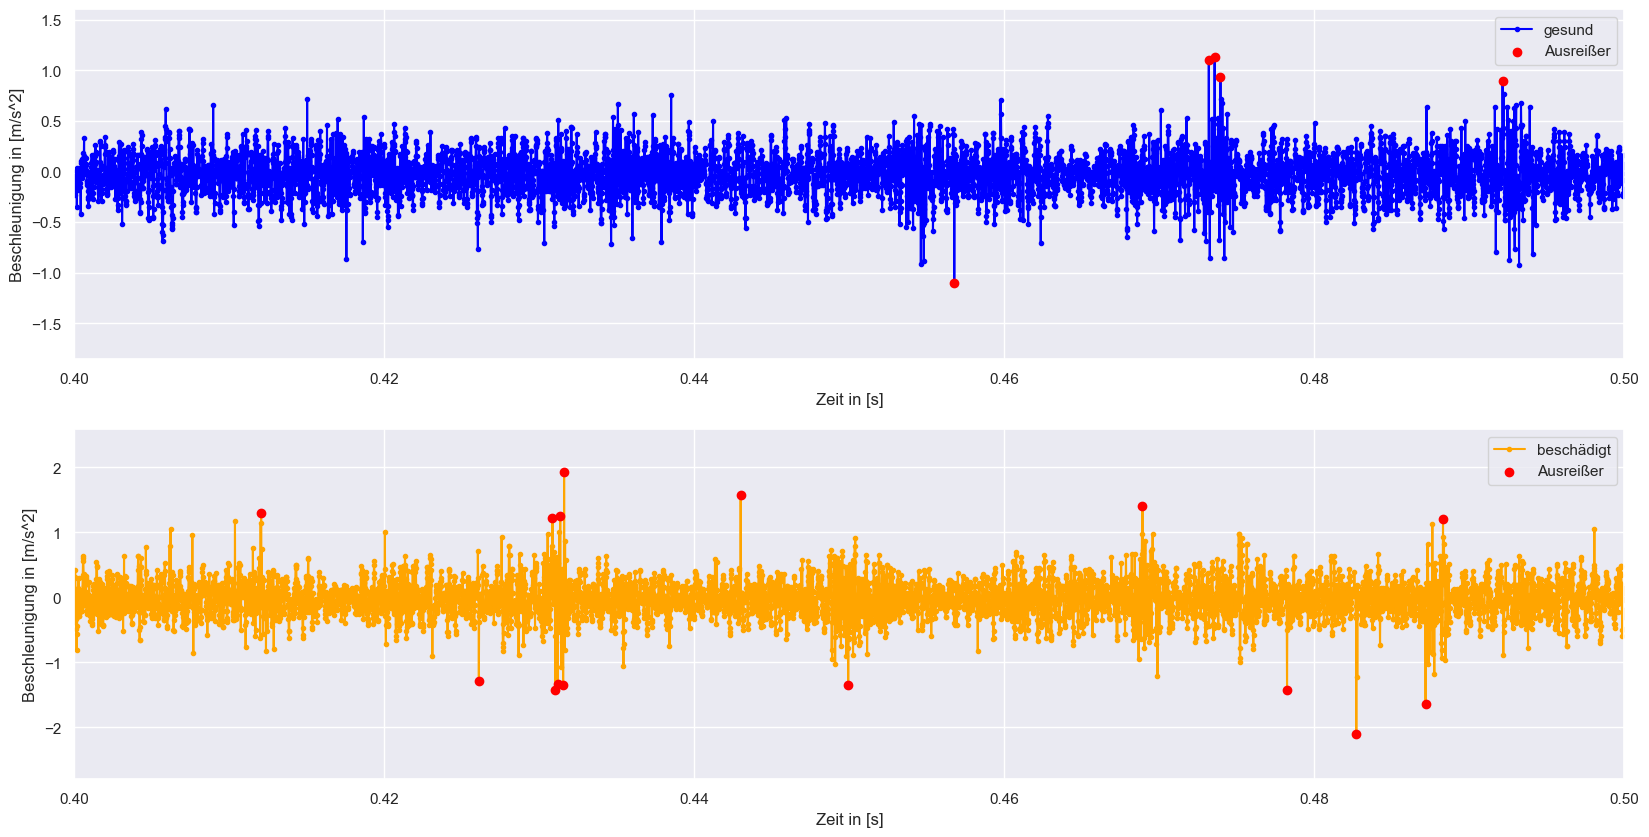

In [8]:
from adtk.detector import GeneralizedESDTestAD
esd_ad = GeneralizedESDTestAD(alpha=1)
anomalies = esd_ad.fit_detect(s)
myplotSmall(tt,s,anomalies,0.4,0.5)

c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\aggregator\_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicte

256000 256000


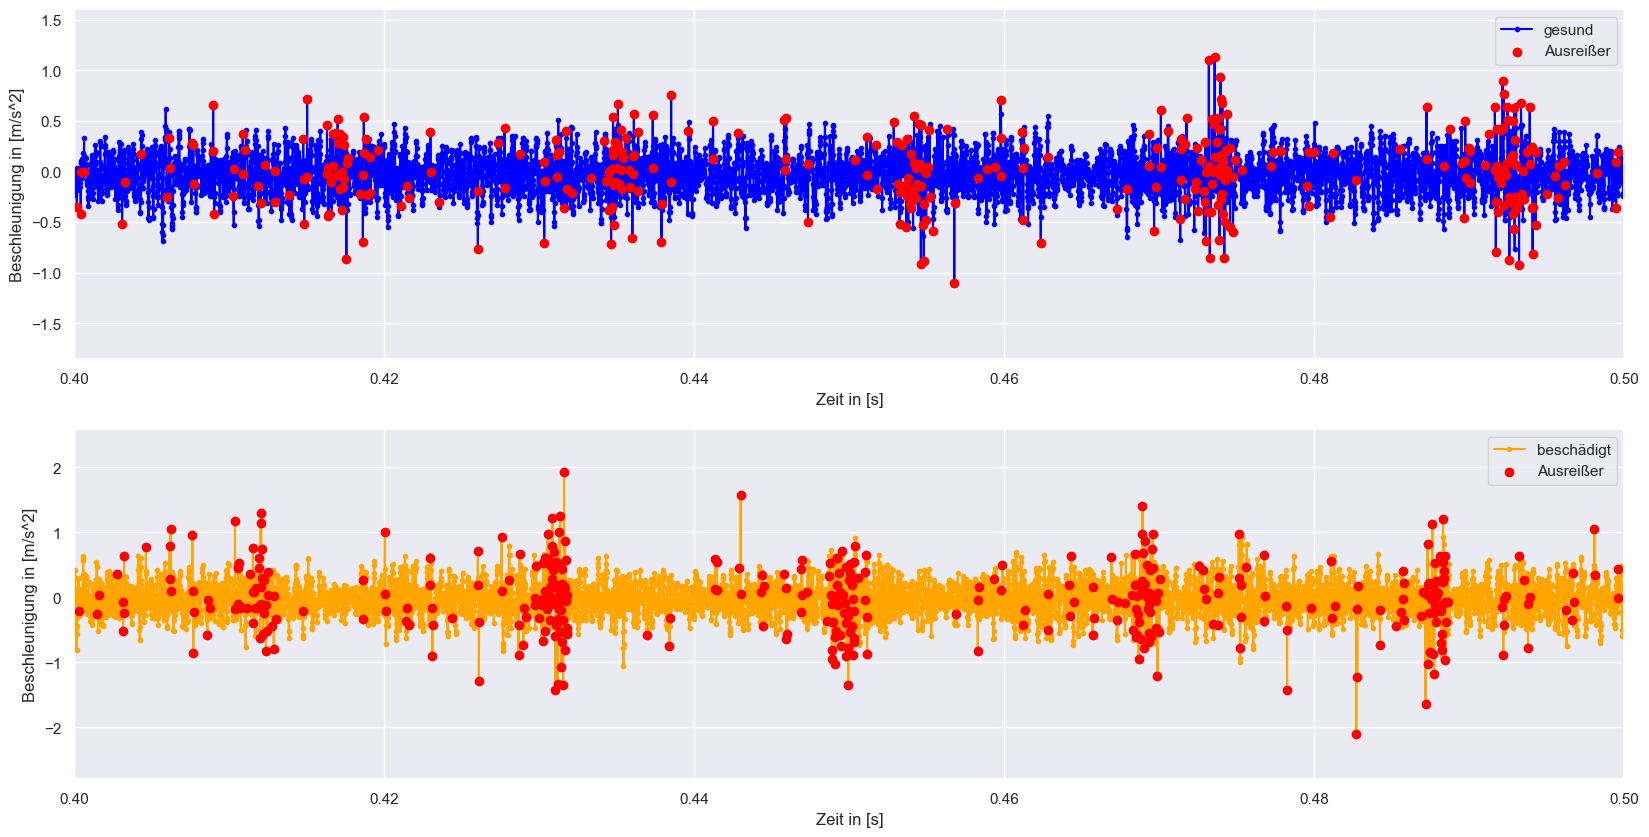

In [9]:
from adtk.detector import PersistAD
persist_ad = PersistAD(c=1.5)
anomalies = persist_ad.fit_detect(s)
#anomalies["healthy"]=np.nan_to_num(anomalies["healthy"],nan=0.0)
#anomalies["broken"]=np.nan_to_num(anomalies["broken"],nan=0.0)

myplotSmall(tt,s,anomalies,0.4,0.5)

c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\aggregator\_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicte

256000 256000


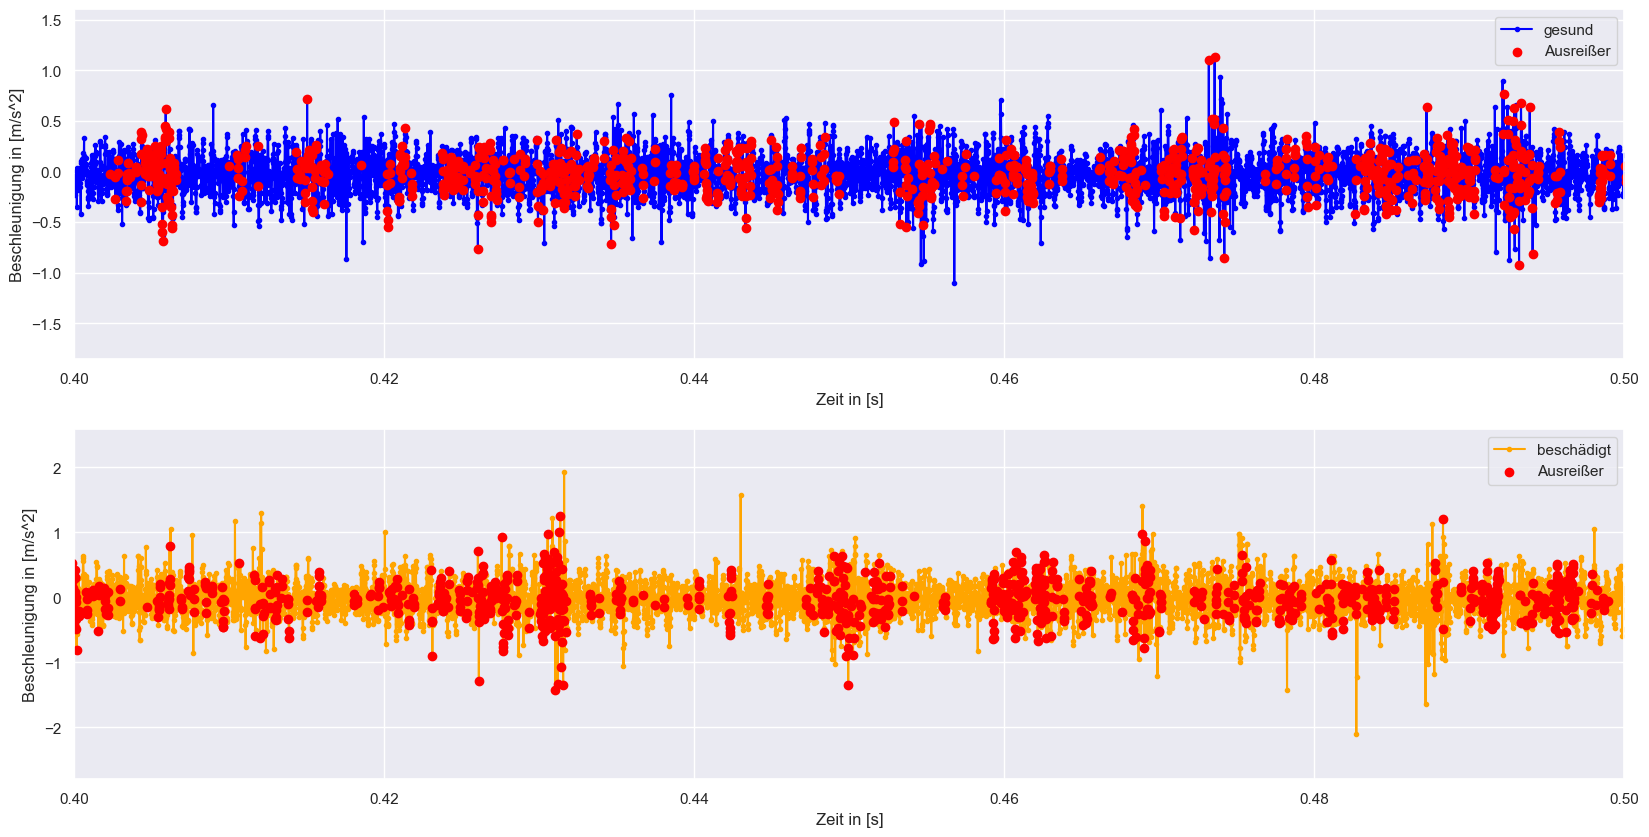

In [10]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=0.25, side='both', window=50)
anomalies = level_shift_ad.fit_detect(s)
myplotSmall(tt,s,anomalies,0.4,0.5)

c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\aggregator\_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicte

256000 256000


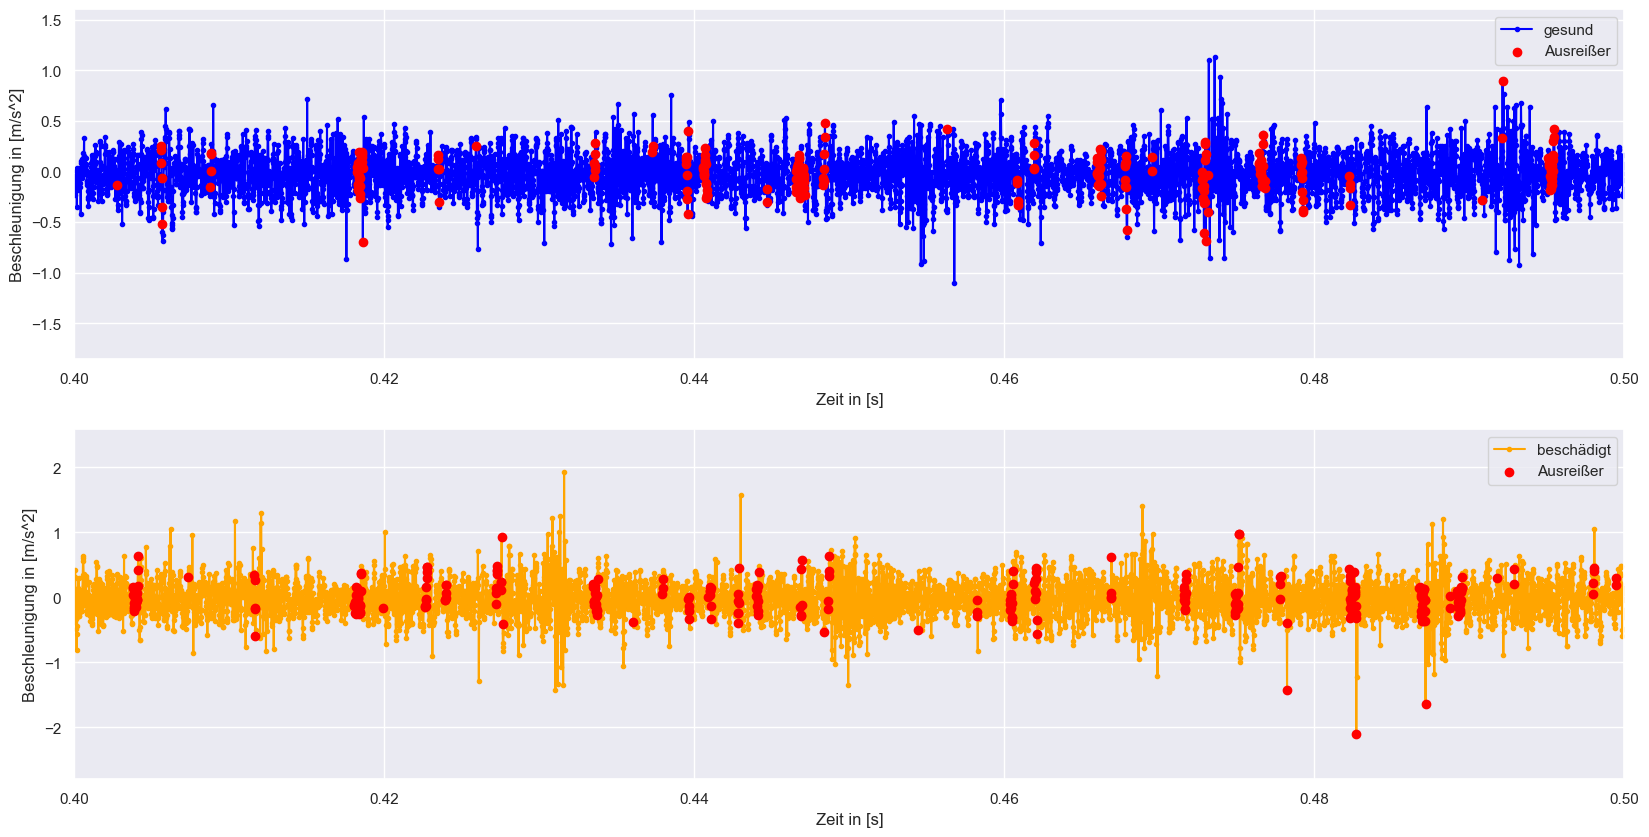

In [11]:

from adtk.detector import VolatilityShiftAD
volatility_shift_ad = VolatilityShiftAD(c=1.5, side='both', window=30)
anomalies = volatility_shift_ad.fit_detect(s)
myplotSmall(tt,s,anomalies,0.4,0.5)

In [12]:

from adtk.detector import SeasonalAD
seasonal_ad = SeasonalAD(c=0.5, side="both")
anomalies = seasonal_ad.fit_detect(s)
#plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")

myplotSmall(tt,s,anomalies,0.4,0.5)

RuntimeError: Series does not follow any known frequency (e.g. second, minute, hour, day, week, month, year, etc.

c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\aggregator\_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[predicted & lists.isna().any(ax

256000 256000


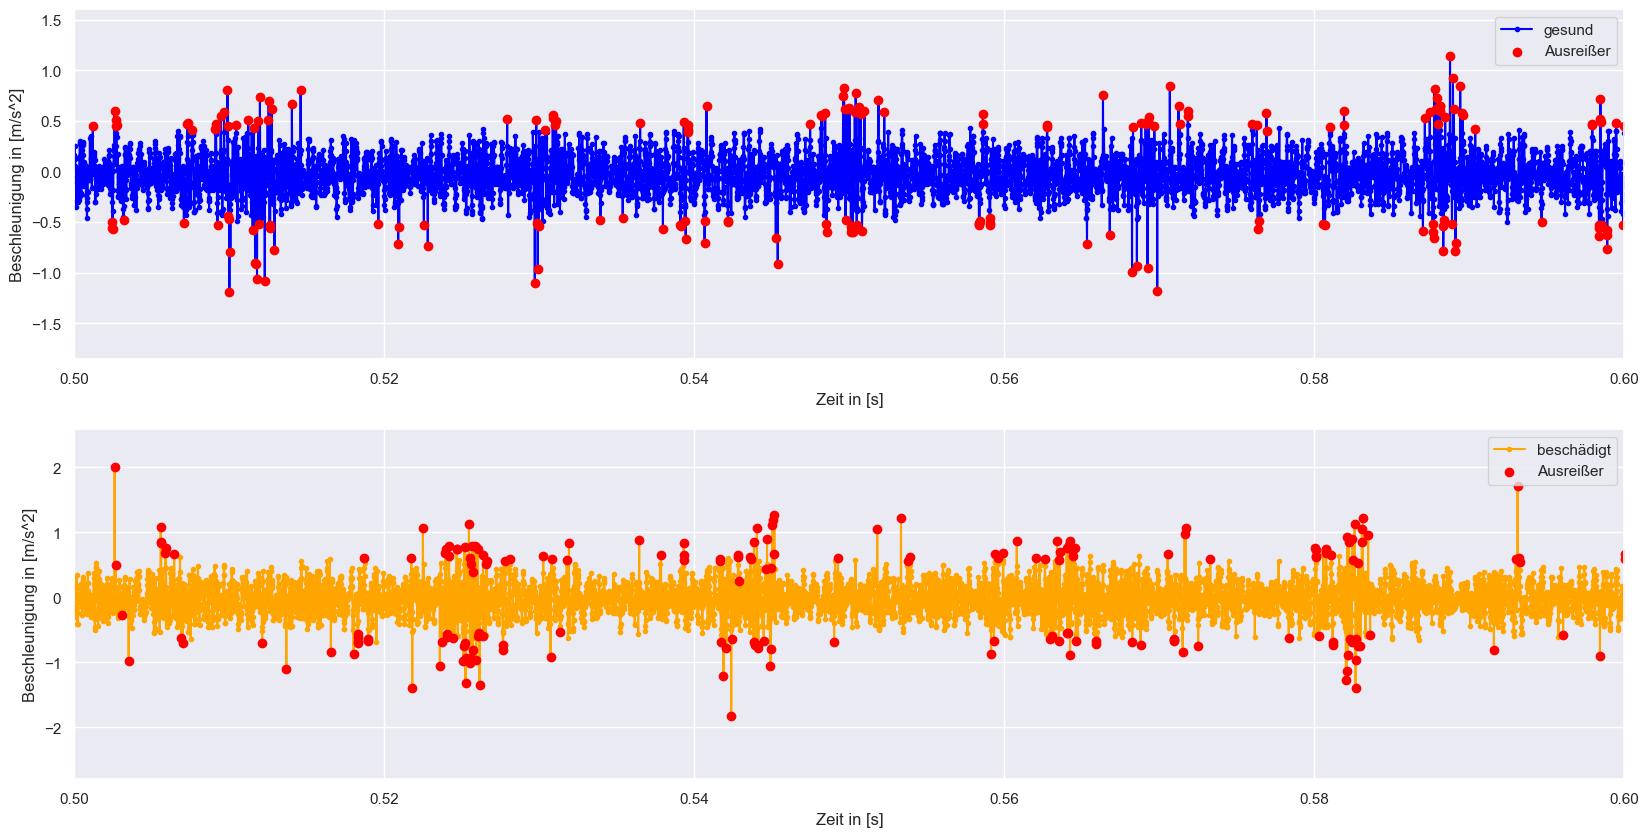

In [ ]:
from adtk.detector import AutoregressionAD
autoregression_ad = AutoregressionAD(n_steps=2, step_size=32, c=1.5)
anomalies = autoregression_ad.fit_detect(s)

#x_auto = np.nan_to_num(x_auto)

#print(x_auto)
myplotSmall(tt,s,anomalies,0.5,0.6)